# Tarea 3.10

#32w33# Sofía González Cataldo, rut 20.921.915-8
Tenemos la siguiente ecuación diferencial

$$
\frac{d}{dx} f(x) = 20 f(x)
$$

y queremos encontrar una $f(x)$ que la cumple y satisface $f(0) = 1$. La respuesta que se obtiene integrando $f(x) = e^{20 x}$ pero imaginemos que no lo sabemos. Una manera aproximada de encontrar $f(1)$ es empezar en $f(0)$ y luego dar un pequeño paso para encontrar $f(\delta x)$ usando

$$
f(\delta x) \approx f(0) + \delta x \frac{d}{dx}f(0) = f(0) + 20\,\delta x f(0)\,.
$$

Luego podemos encontrar $f(2\delta x)$ de manera análoga

$$
f(2\delta x) \approx f(\delta x) + 20\,\delta x f(\delta x)
$$

Si repetimos el proceso $n$ veces tal que $n\,\delta x = 1$, podemos encontrar una solución aproximada para $f(1)$.

Escriba un código que haga lo que acabamos de describir en $n$ pasos. Luego grafique el error relativo de la aproximación en función de $n$ y estime la convergencia de este método. 

Para lograrlo, grafique varias potencias de $n$ en un gráfico log-log y encuentre cuál tiene una pendiente similar a lo que usted obtuvo.

Ingrese un valor para n, número entero mayor que 1


 5000


n = 5000


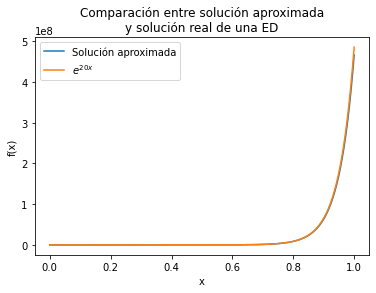

In [196]:
# Preparar librería
import numpy as np
import matplotlib.pyplot as plt

print('Ingrese un valor para n, número entero mayor que 1')
n = int(input())
print(f'n = {n}')

f = 1 # f(0) = 1
i = 1 # inicializador, el valor para 0 ya está definido
y = np.ones(n+1) #arreglo de n+1 cantidad de unos (se modificarán para graficar luego).
e = np.ones(n+1) #la idea es que sean de n+1 dimensiones ya que se toma la posición 0 hasta n, incluido el extremo superior.
error = np.zeros(n+1) #arreglo de ceros, reemplazaremos todos los valores menos el inicial. y[0]-e[0] = 0.
#usamos arreglos de unos para y, e, ya que y[0], e[0] poseen valor 1 y no serán modificados.
deltax = 1/n #queremos aproximación tal que ndeltax = 1, realizamos el despeje para crear variable


while i <= n:                  #para obtener el valor de f(ndeltax), se utilizan los datos de f((n-1)deltax).
    f = f + (20*f)*deltax      #al llegar al valor i = n el ciclo se detiene.
    y[i] = f                   #modifica los valores del arreglo y, con la aproximación de la ED para cada i(deltax)
    e[i] = np.exp(20*i*deltax) #modifica arreglo e, con la solución real de la ED.
    i += 1                     #aumenta el valor del contador.
    
    
x = np.linspace(0, 1, n+1) #arreglo de n+1 números entre 0 y 1, con esto graficaremos los n+1 valor de y, e.
#se obtienen n+1 valores ya que consideramos el inicial que es 1, más las n aproximaciones.

plt.plot(x, y, label='Solución aproximada')     #Se grafica la estimación y el valor verdadero.
plt.plot(x, e, label='$e^{20x}$')
plt.title('Comparación entre solución aproximada\ny solución real de una ED')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Para este caso, nuestro x corresponde a $\delta x = \frac{1}{n}$ por lo que el intervalo de 0 a 1 lo dividimos n veces (se considera ${n+1}$ ya que python pide la cantidad de números y no las divisiones del intervalo, así tomará también el valor inicial de ${f(0) = 1}$). 

 100


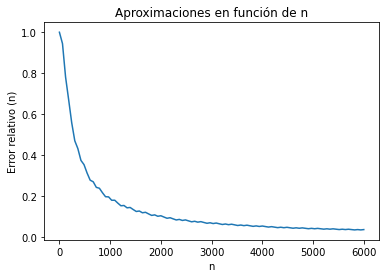

Text(0.5, 1.0, 'Aproximaciones en gráfico log-log')

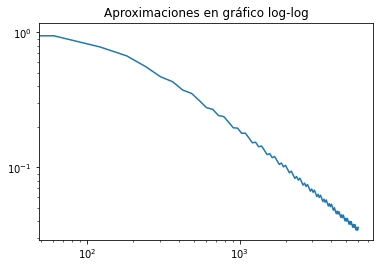

In [194]:
def error_relativo(m):       #realizamos el mismo procedimiento anterior, pero con una función.
    inicio = 1               #así se logra modificar el valor de m (equivale a n) y tener el error relativo para cada valor.
    func = 1
    while inicio < m:
        func = func + (20*func/m)
        inicio += 1                                              
    return np.abs(func - np.exp(20))/np.exp(20)    #aquí se calcula el error según el n que se ha elegido
                                                   #ndeltax = 1

m = np.linspace(0, 6000, int(input())) #solicitamos la división del intervalo
                                      #así se observa el comportamiento con diferentes valores de n.
errores = np.ones(len(m))             #arreglo de igual dimensión de m, se modificarán con los errores dependiendo de cada n.
                                      #de este modo no cambiamos cada valor en todas las modificaciones.
for j in range(len(m)):    #modifica la posición del arreglo errores con lo obtenido en la función error_relativo.
    errores[j] = error_relativo(m[j])
    
plt.plot(m, errores)
plt.title('Aproximaciones en función de n')
plt.xlabel('n')
plt.ylabel('Error relativo (n)')
plt.show()

plt.loglog(m, errores) #grafico log-log para analizar convergencia.
plt.title('Aproximaciones en gráfico log-log')

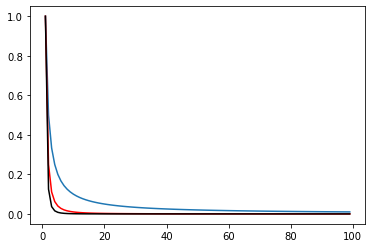

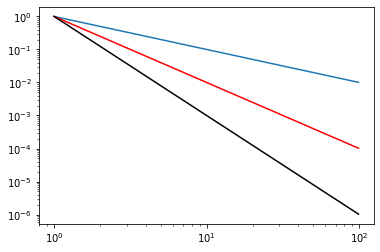

In [193]:
k = []
p = []
s = []
t = []
for a in range(1, 100):
    k.append(1/a)
    s.append(1/a**2)
    p.append(a)
    t.append(1/a**3)
plt.plot(p, k)
plt.plot(p, s, color='red')
plt.plot(p, t, color='black')
plt.show()

plt.loglog(p, k)
plt.loglog(p, s, color='red')
plt.loglog(p, t, color='black')
#estas son las curvas a analizar para la determinación de la convergencia del error relativo.

La gráfica más similar vendría siendo la de $\frac{1}{n}$ al igual que la pendiente en los rangos de $ 0 < x < 10^{2} $, por lo tanto esta sería la potencia de como se comporta la convergencia.